# Por que não utilizaremos a tabela FALHAS_PREDICT
Foram enviadas duas novas tabelas (FALHAS_PREDICT e PREDICT), observamos que na tabela PREDICT apresenta uma coluna a mais (S_GROUP_ID) que faz um agrupamento das falhas por números e essa coluna, visando o escopo macro do projeto, faz muito mais sentido do que desperdiçarmos tempo em uma tabela que não vamos usar.



# Tratamento da tabela predict

## Instalando e importando bibliotecas

In [1]:
!pip install pandas pyarrow numpy


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install numpy


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install --upgrade numpy


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import numpy as np
import requests
import io
import re

# Importando dataset

In [7]:
df_falhas_predict = pd.read_csv("../../../data/csv/FALHAS_PREDICT.csv")

In [8]:
df_falhas_predict.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,82662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
2,NaN,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta dianteira Folga (Ajuste),9/1/2023 22:01:44
3,NaN,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta traseira Folga (Ajuste),9/1/2023 22:01:03
4,NaN,2023-4130482,AUDI Q3,2Y2Y,DSN,PCEQS999,2054701,ESPC,Lanterna tras (09) Interfere,10/1/2023 09:01:25


In [9]:
df_falhas_predict.drop(columns = 'Unnamed: 0', inplace=True)

In [10]:
df_falhas_predict.columns = df_falhas_predict.iloc[1]
df_falhas_predict.drop([0,1], axis = 0, inplace=True)

In [11]:
columns = df_falhas_predict.columns.tolist()
print("Columns:", columns)

Columns: ['KNR', 'MODELO', 'COR', 'MOTOR', 'ESTACAO', 'USUARIO', 'HALLE', 'FALHA', 'DATA']


In [12]:
df_falhas_predict.head()

1,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
2,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta dianteira Folga (Ajuste),9/1/2023 22:01:44
3,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta traseira Folga (Ajuste),9/1/2023 22:01:03
4,2023-4130482,AUDI Q3,2Y2Y,DSN,PCEQS999,2054701,ESPC,Lanterna tras (09) Interfere,10/1/2023 09:01:25
5,2023-4130482,AUDI Q3,2Y2Y,DSN,PCEQS999,2054701,ESPC,Emblema / logo - Adesivos em geral Solto(a) ¨,10/1/2023 09:01:41
6,2023-4130664,AUDI Q3,6Y6Y,DSN,PCEQS805,7000240,ZP82,Painel instrumentos Ruído (-),10/1/2023 11:01:56


In [13]:
df_falhas_predict.drop(columns='MODELO', inplace=True)

In [14]:
df_falhas_predict.drop_duplicates(inplace=True)

In [15]:
df_falhas_predict['FALHA'].value_counts()

FALHA
Painel lateral Sujeira na pintura                      30576
Painel lateral 04. Caroço / Pico                       21489
Painel lateral 01. Amassado                            11033
Paralama dianteiro 04. Caroço / Pico                   10986
Tampa dianteira Sujeira na pintura                     10888
                                                       ...  
INTERRUPTOR REG. ALTURA FARÓIS FUNÇÃO NOK                  1
TAMPA DIANTEIRA RUÍDO DE CHAPA                             1
FAROL (09) CHICOTE DANIFICADO (&)                          1
ILUMINAÇÃO TRASEIRA INTERNA CONECTOR DANIFICADO (&)        1
Porta Objetos do Console Central Ajuste incorreto          1
Name: count, Length: 6194, dtype: int64

In [16]:
df_falhas_predict['FALHA'] = df_falhas_predict['FALHA'].str.upper()
df_falhas_predict[['PEÇA', 'FALHA_PEÇA']] = df_falhas_predict['FALHA'].str.split(' ', expand=True, n=1)

df_falhas_predict['HALLE'] = df_falhas_predict['HALLE'].str.split(' ').str[0]

In [17]:
df_falhas_predict.head()

1,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA,PEÇA,FALHA_PEÇA
2,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,PORTA DIANTEIRA FOLGA (AJUSTE),9/1/2023 22:01:44,PORTA,DIANTEIRA FOLGA (AJUSTE)
3,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,PORTA TRASEIRA FOLGA (AJUSTE),9/1/2023 22:01:03,PORTA,TRASEIRA FOLGA (AJUSTE)
4,2023-4130482,2Y2Y,DSN,PCEQS999,2054701,ESPC,LANTERNA TRAS (09) INTERFERE,10/1/2023 09:01:25,LANTERNA,TRAS (09) INTERFERE
5,2023-4130482,2Y2Y,DSN,PCEQS999,2054701,ESPC,EMBLEMA / LOGO - ADESIVOS EM GERAL SOLTO(A) ¨,10/1/2023 09:01:41,EMBLEMA,/ LOGO - ADESIVOS EM GERAL SOLTO(A) ¨
6,2023-4130664,6Y6Y,DSN,PCEQS805,7000240,ZP82,PAINEL INSTRUMENTOS RUÍDO (-),10/1/2023 11:01:56,PAINEL,INSTRUMENTOS RUÍDO (-)


In [18]:
count_starts_with_2024 = df_falhas_predict['KNR'].str.startswith('2024').sum()
print("Número de KNRs de 2024:", count_starts_with_2024)
count_starts_with_2023 = df_falhas_predict['KNR'].str.startswith('2023').sum()
print("Número de KNRs de 2023:", count_starts_with_2023)

Número de KNRs de 2024: 209824
Número de KNRs de 2023: 450984


In [19]:
df_falhas_predict['MOTOR'].value_counts()

MOTOR
DHS    423663
CWL    169596
CWS     40191
DRP     24140
DSN      3217
            1
Name: count, dtype: int64

In [20]:
df_falhas_predict['HALLE'].unique()

array(['ZP5', 'ESPC', 'ZP82', 'Q3RE', 'ZP7', 'ROD', 'ZP5A', 'ZP6', nan,
       'ZP8', 'AGUA', 'BUY', 'PROC', 'ZP61', 'ZP62', 'CAB', 'INTE',
       'ZP8R', 'ZP6Q', 'DKA', 'RUID', 'TLUI', 'PVC', '', 'PROF'],
      dtype=object)

In [21]:
df_falhas_predict['HALLE'] = df_falhas_predict['HALLE'].str.split(' ').str[0]

In [22]:
data_types = df_falhas_predict.dtypes
print("Data Types:\n", data_types)

Data Types:
 1
KNR           object
COR           object
MOTOR         object
ESTACAO       object
USUARIO       object
HALLE         object
FALHA         object
DATA          object
PEÇA          object
FALHA_PEÇA    object
dtype: object


# Mais Validações dos dados 

In [45]:
df_validate = df_falhas_predict.pivot_table(index='KNR', columns='HALLE', aggfunc='size', fill_value=0)

In [47]:
df_validate.columns = [f'QTD_FALHAS_{col}' if col.strip() else 'QTD_FALHAS_SEM_HALLE' for col in df_validate.columns]

In [48]:
df_validate.reset_index(inplace=True)

In [49]:
df_validate.head()

,KNR,QTD_FALHAS_SEM_HALLE,QTD_FALHAS_AGUA,QTD_FALHAS_BUY,QTD_FALHAS_CAB,QTD_FALHAS_DKA,QTD_FALHAS_ESPC,QTD_FALHAS_INTE,QTD_FALHAS_PROC,QTD_FALHAS_PROF,...,QTD_FALHAS_ZP5,QTD_FALHAS_ZP5A,QTD_FALHAS_ZP6,QTD_FALHAS_ZP61,QTD_FALHAS_ZP62,QTD_FALHAS_ZP6Q,QTD_FALHAS_ZP7,QTD_FALHAS_ZP8,QTD_FALHAS_ZP82,QTD_FALHAS_ZP8R
0,2023-0210157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2023-0210201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-0210272,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-0210532,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023-0210653,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
cont_zp7 = (df_falhas_predict['HALLE'] == 'ZP7').sum()
print(f"Total de ocorrências de ZP7 no df antigo: {cont_zp7}")

conta_zp7_validate = (df_validate['QTD_FALHAS_ZP7']).sum()
print(f"Total de ocorrências de ZP7 no df pivot: {conta_zp7_validate}") 

Total de ocorrências de ZP7 no df antigo: 360620
Total de ocorrências de ZP7 no df pivot: 360620


In [54]:
df_validate.to_parquet('falha_processadas.parquet', index=False)

In [55]:
motor_cor_df = df_falhas_predict.groupby('KNR')[['MOTOR', 'COR']].first().reset_index()
df_validate = pd.merge(df_validate, motor_cor_df, on='KNR', how='left')

In [56]:
cols = df_validate.columns.tolist()

new_order = ['KNR', 'MOTOR', 'COR'] + \
            [col for col in cols if col not in ('KNR', 'MOTOR', 'COR', 'QTD_FALHAS_SEM_HALLE')] + \
            ['QTD_FALHAS_SEM_HALLE']

df_validate = df_validate[new_order]

In [57]:
df_validate['MOTOR'] = df_validate['MOTOR'].replace(r'^\s*$', np.nan, regex=True)

In [58]:
df_validate['TEM_FALHA_ROD'] = np.where(df_validate['QTD_FALHAS_ROD'] > 0, 1, 0)

In [59]:
df_validate

,KNR,MOTOR,COR,QTD_FALHAS_AGUA,QTD_FALHAS_BUY,QTD_FALHAS_CAB,QTD_FALHAS_DKA,QTD_FALHAS_ESPC,QTD_FALHAS_INTE,QTD_FALHAS_PROC,...,QTD_FALHAS_ZP6,QTD_FALHAS_ZP61,QTD_FALHAS_ZP62,QTD_FALHAS_ZP6Q,QTD_FALHAS_ZP7,QTD_FALHAS_ZP8,QTD_FALHAS_ZP82,QTD_FALHAS_ZP8R,QTD_FALHAS_SEM_HALLE,TEM_FALHA_ROD
0,2023-0210157,DSN,6Y6Y,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2023-0210201,DSN,2D2D,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-0210272,DSN,6Y6Y,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-0210532,DSN,6Y6Y,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2023-0210653,DSN,Z7Z7,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82656,2024-5076008,DHS,0Q0Q,0,0,2,0,44,0,0,...,0,0,0,0,12,2,0,0,0,1
82657,2024-5076009,DHS,0Q0Q,0,0,0,0,14,0,0,...,2,0,0,0,0,2,0,0,0,0
82658,2024-5076011,DHS,0Q0Q,0,0,0,0,26,0,0,...,0,0,0,0,8,2,0,0,0,1
82659,2024-5076013,DHS,0Q0Q,0,0,0,0,26,0,0,...,6,0,0,0,14,2,0,0,0,0


#  Visualizações com o matplotlib

In [35]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

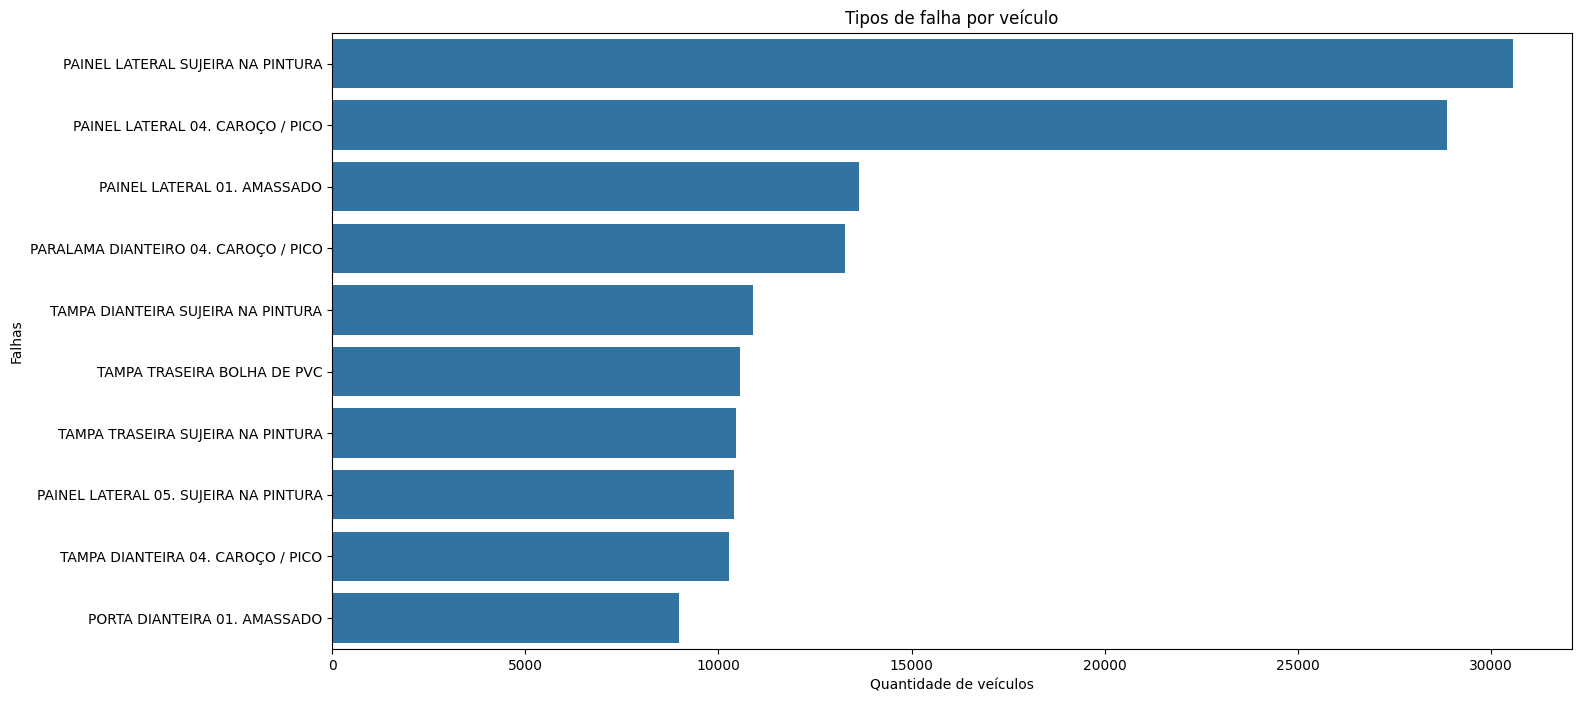

In [36]:
plt.figure(figsize=(16, 8))

order = df_falhas_predict['FALHA'].value_counts().nlargest(10).index

# Plotando o gráfico
sns.countplot(data=df_falhas_predict, y='FALHA', order=order)
plt.title('Tipos de falha por veículo')
plt.xlabel('Quantidade de veículos')
plt.ylabel('Falhas')
plt.show()

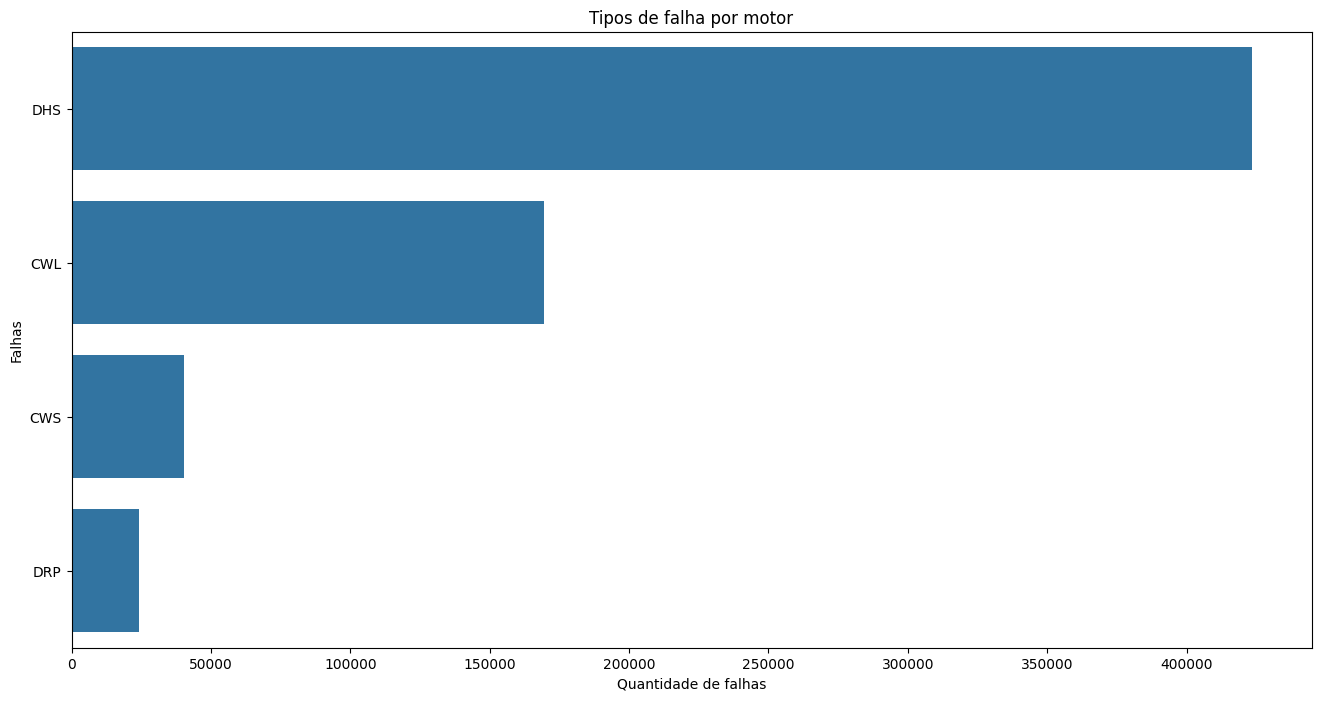

In [37]:
plt.figure(figsize=(16, 8))

order = df_falhas_predict['MOTOR'].value_counts().nlargest(4).index

sns.countplot(data=df_falhas_predict, y='MOTOR', order=order)
plt.title('Tipos de falha por motor')
plt.xlabel('Quantidade de falhas')
plt.ylabel('Falhas')
plt.show()

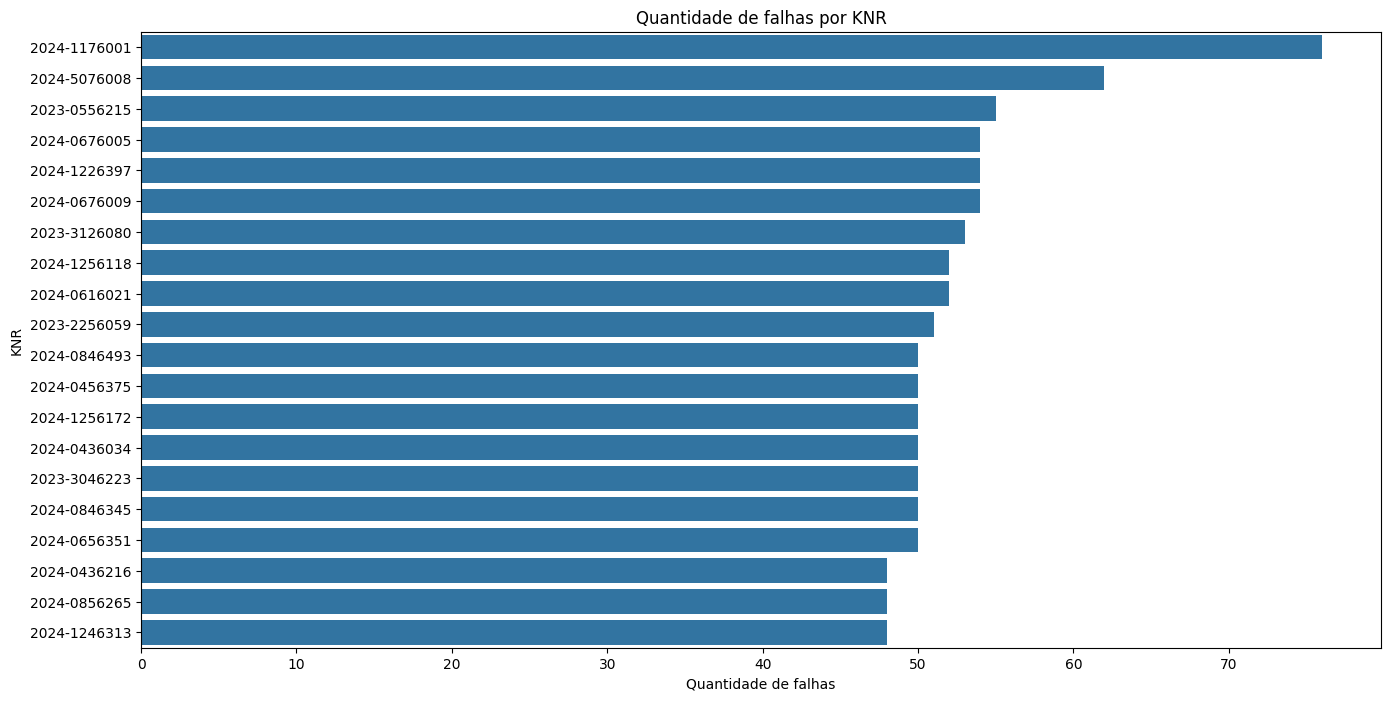

In [43]:
plt.figure(figsize=(16, 8))

order = df_falhas_predict['KNR'].value_counts().nlargest(20).index

# Plotando o gráfico
sns.countplot(data=df_falhas_predict, y='KNR', order=order)
plt.title('Quantidade de falhas por KNR')
plt.xlabel('Quantidade de falhas')
plt.ylabel('KNR')
plt.show()

In [42]:
df_falhas_predict['KNR'].describe()

count           660808
unique           82662
top       2024-1176001
freq                76
Name: KNR, dtype: object

In [40]:
media_de_falhas_por_knr = df_falhas_predict['KNR'].value_counts().mean()
print("Média de falhas por KNR:", media_de_falhas_por_knr)

Média de falhas por KNR: 7.994096440928117


In [41]:
df_falhas_predict['COR'].value_counts()

COR
K2K2    149536
2R2R    146538
0Q0Q    145177
A1A1     81452
5T5T     51426
2RA1     19964
K2A1     17858
0QA1     13815
8E8E     12633
6K6K     11384
5TA1      3790
6KA1      3438
0E0E       996
6Y6Y       893
Z7Z7       456
2D2D       357
8EA1       342
2Y2Y       259
6UA1       195
Z9Z9       128
6U6U        43
N6N6        34
Y1Y1        30
B1B1        29
T9T9        24
M9M9        11
Name: count, dtype: int64

In [44]:
df_falhas_predict['COR'].describe()

count     660808
unique        26
top         K2K2
freq      149536
Name: COR, dtype: object